In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
pip install pdfplumber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
pip install tabula-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 7.1 MB/s 


In [44]:
import PyPDF2
import pandas as pd
import numpy as np
#import tabula
from tabula import read_pdf_table
#tables = read_pdf("/content/drive/Shareddrives/CS506 Project/deliverables/Deliverable 2/Newton/FIO_Analysis1.pdf", pages="all")
tables =read_pdf_table("/content/drive/Shareddrives/CS506 Project/deliverables/Deliverable 2/Newton/FIO_Analysis1.pdf", pages='all')
# Read pdf into list of DataFrame
#dfs = PyPDF2.PdfFileReader("/content/drive/Shareddrives/CS506 Project/deliverables/Deliverable 2/Newton/FIO_Analysis1.pdf")
#print(dfs.getPage(0).extractText())
#display(dfs)
#dfs.count(axis=0, level=None, numeric_only=False)

In [49]:
tables[0]

,Unnamed: 0,"Newton Police FIO's, September 1, 2015 to May 30, 2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Report #,NaN,Date/Time,Type/Offense,Location,Race,Gender,Age,Reason,Officer Initiated,Frisked,Weapon or Contraband\ron Person,NaN
1,NaN,15030699‐1,NaN,9/12/2015 20:49,FIO,ALBEMARLE RD & NORTH ST (NV),W,M,75,Call for a male sleeping on a bench,No,No,No,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,15032238‐1,NaN,9/24/2015 18:39,FIO,PARKER ST & WHEELER RD,B,F,25,Call For Solicitors in the Area Ringing Doorbells,No,No,No,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,NaN,16041535‐1,NaN,11/23/2016 23:52,FIO,BOSTON SPORTS CLUB / 135 WELLS AVE,W,F,18,Call For Teens Starting a Fire in Woods,No,No,No,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,16041535‐1,NaN,11/23/2016 23:52,FIO,BOSTON SPORTS CLUB / 135 WELLS AVE,W,F,18,Call For Teens Starting a Fire in Woods,No,No,No,NaN


In [ ]:
import pdfplumber as pr
import pandas as pd
from matplotlib import pyplot as plt

pdf = pr.open('/content/drive/Shareddrives/CS506 Project/deliverables/Deliverable 2/Newton/FIO_Analysis1.pdf')
ps = pdf.pages
i1 = 0
table1 = [[0 for i in range(11)] for j in range(220)]
for p in range(len(ps)):
    pg = ps[p]
    tables = pg.extract_tables()
    table = tables[0]
    df = pd.DataFrame(table[1:],columns = table[0])
    #print(len(table), len(table[0]))
    
    for i in range(len(table)):
        for j in range(len(table[i])):
            table1[i1][j] = table[i][j]
        i1 = i1+1
        
df = pd.DataFrame(table1[1:],columns = table1[0])
df.to_excel('FIO_Analysis1.xlsx')
pdf.close()

df = pd.read_excel('FIO_Analysis1.xlsx')
c_list = df.values.tolist()[0]  
df.columns = c_list
df.drop([0], inplace=True)

df_race = df.Race.value_counts()  
df_race.drop(0,axis = 0,inplace = True) 
x = df_race.index
y = df_race.values
plt.bar(x, y, color="blue")
plt.xlabel("Race")
plt.ylabel("The Numeber of People")
plt.title("The statistics for Race")
plt.show()

In [ ]:
df_Gender = df.Gender.value_counts()  
df_Gender.drop(0,axis = 0,inplace = True) 
x = df_Gender.index
y = df_Gender.values
plt.bar(x, y, color=["blue","pink","green"])
plt.xlabel("Gender")
plt.ylabel("The Numeber of People")
plt.title("The statistics for sex")
plt.show()

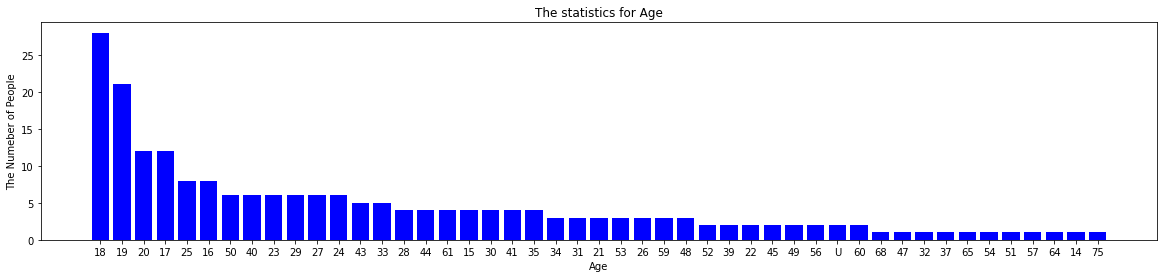

In [11]:
df_Age = df.Age.value_counts()  
df_Age.drop(0,axis = 0,inplace = True) 
x = df_Age.index
y = df_Age.values
plt.figure().set_figwidth(20)
plt.bar(x, y, color="blue")
plt.xlabel("Age")
plt.ylabel("The Numeber of People")
plt.title("The statistics for Age")
plt.show()

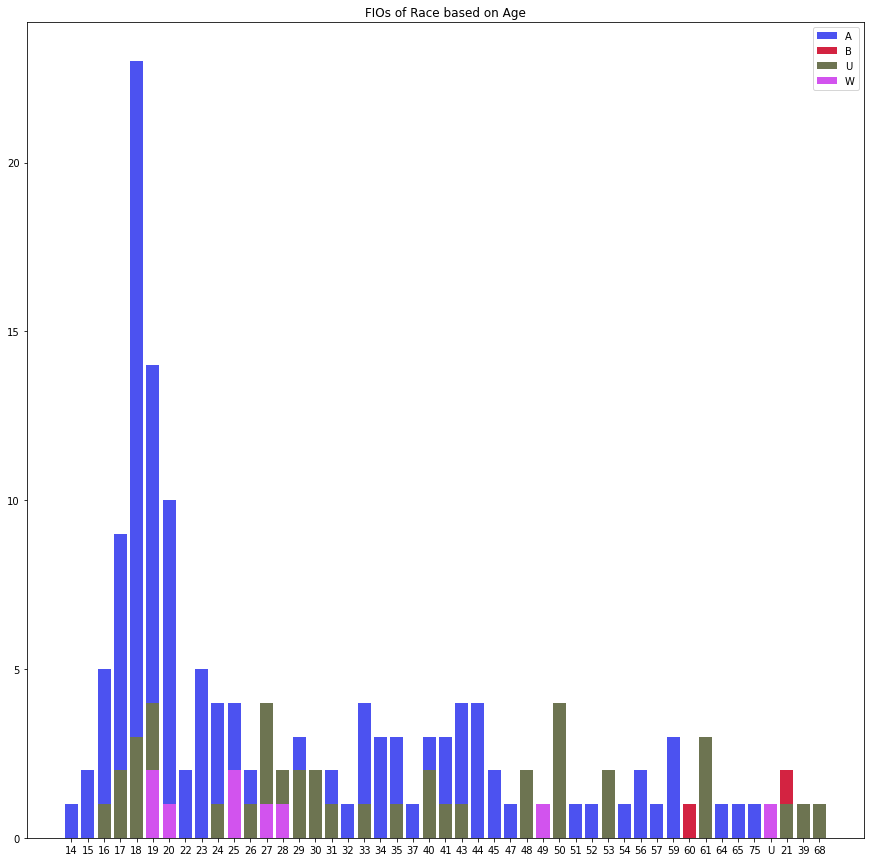

In [14]:
race_W = df[df['Race'] == 'W']
age_W = race_W.groupby('Age').size()
race_A = df[df['Race'] == 'A']
age_A = race_A.groupby('Age').size()
race_B = df[df['Race'] == 'B']
age_B = race_B.groupby('Age').size()
race_U = df[df['Race'] == 'U']
age_U = race_U.groupby('Age').size()
fig = plt.figure(figsize=(15,15))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
plt.bar(age_W.index, age_W.values, color=np.random.rand(3,))
plt.bar(age_A.index, age_A.values, color=np.random.rand(3,))
plt.bar(age_B.index, age_B.values, color=np.random.rand(3,))
plt.bar(age_U.index, age_U.values, color=np.random.rand(3,))
plt.xlabel=('Age')
plt.ylabel=('Number of FIOs Reported')
plt.title('FIOs of Race based on Age')
plt.legend(['A', 'B', 'U', 'W'])
plt.show()

TypeError: ignored

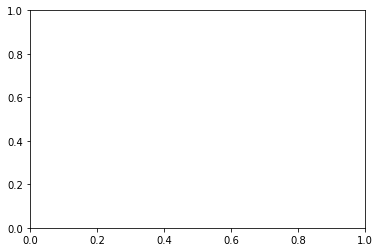

In [15]:
total_Age = df.groupby(['Age']).size()
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.3)
plt.bar(total_Age.index, total_Age.values, color='black')
plt.xlabel=('Age')
plt.ylabel=('Total FIOs Reported')
plt.title('Number of FIOs by Age')
plt.show()

Text(0.5, 1.0, 'Percentage of FIOs by gender')

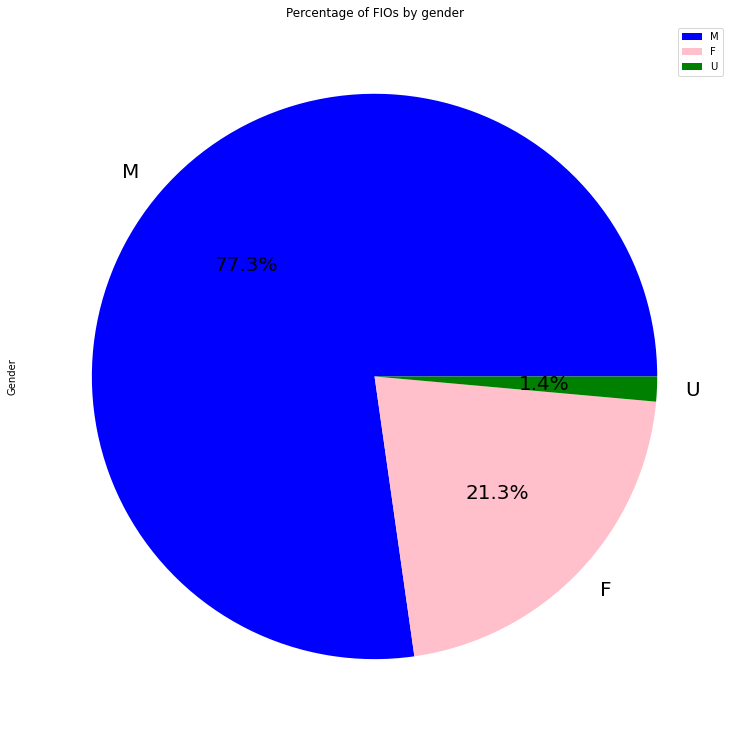

In [16]:
color = ['blue', 'pink', 'green']
fig = plt.figure(figsize=(13, 13))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
plot = df_Gender.plot.pie(subplots=True, autopct='%1.1f%%',colors=color,textprops={'fontsize': 20})
plt.legend()
plt.title('Percentage of FIOs by gender')


Text(0.5, 1.0, 'Percentage of FIOs based on Race')

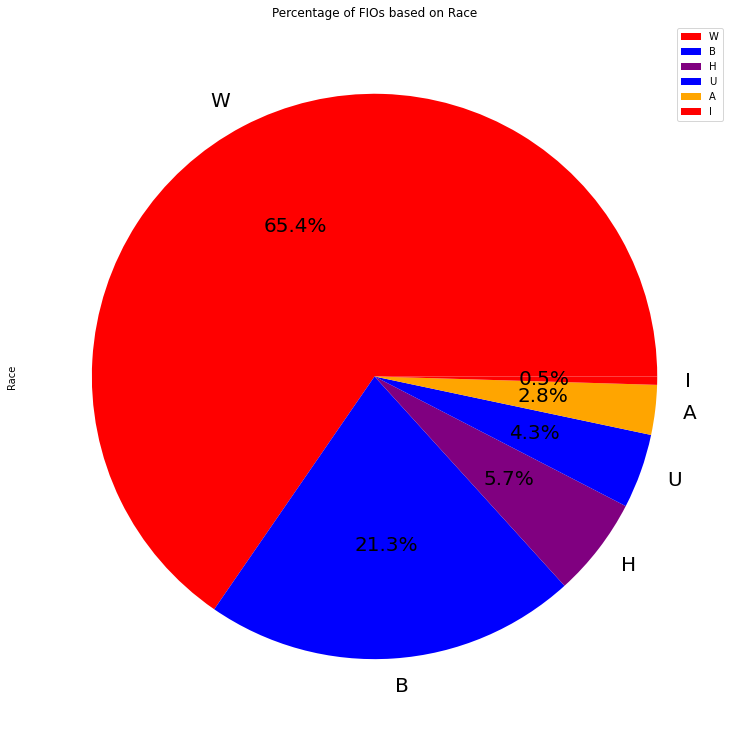

In [17]:
color = ['red', 'blue', 'purple', 'blue', 'orange']
fig = plt.figure(figsize=(13, 13))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
plot = df_race.plot.pie(subplots=True, autopct='%1.1f%%', colors=color,textprops={'fontsize': 20})
plt.legend()
plt.title('Percentage of FIOs based on Race')

In [18]:
df['Date'] = df['Date'].apply(str)
df['Years'] = df['Date'].apply(lambda x: x[:4])
df['Months'] = df['Date'].apply(lambda x: x[5:7])
#years = ['2016', '2017', '2018', '2019', '2020', '2021']
#year_total = []
for i in range(len(years)):
    getYear = df[df['Years'] == years[i]]
    year_total.append(len(getYear.index))
    per_month = getYear.groupby('Months').size()
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(1)
    ind = np.arange(12)
    ax.set_xticks(ind, labels=[range(0, 100, 5)])
    plt.plot(per_month.index, per_month.values, color=np.random.rand(3,))
    plt.xlabel=('Age')
    plt.ylabel=('Total FIOs Reported')
    plt.title('Trend of FIOs for the Year ' + years[i])
    plt.show()
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
plt.plot(years, year_total, color='blue')
plt.xlabel=('Years')
plt.ylabel=('Total FIOs Reported')
plt.title('Trend of FIOs since 2016')
plt.show()

KeyError: ignored